# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn import datasets as ds
import matplotlib.pyplot as plt

## Loading dataset

In [2]:
boston = ds.load_boston()

x_raw = boston.data[:,np.argwhere(boston.feature_names == 'RM')[0,0]]
y_raw = boston.target

## Boston House Prices Dataset
A descroption of the dataset used is provided here.

Data Set Characteristics:  
    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing

## 1. Data Preparation

### 1.1 Train-Test Split

In [3]:
total_count = x_raw.shape[0]

split = int(total_count * 0.6)

# Shuffle the data to avoid any ordering bias..
np.random.seed(0)
shuffle = np.random.permutation(total_count)

x = x_raw[shuffle]
y = y_raw[shuffle]

x_train_unnormalised = x[:split]
y_train_unnormalised = y[:split]

x_test_unnormalised = x[split:]
y_test_unnormalised = y[split:]

print('Training set size:', x_train_unnormalised.shape[0])
print('Test set size:', x_test_unnormalised.shape[0])

Training set size: 303
Test set size: 203


### 1.2 Visualisation of Training Data

Text(0.5, 1.0, 'Plot of the Training Data')

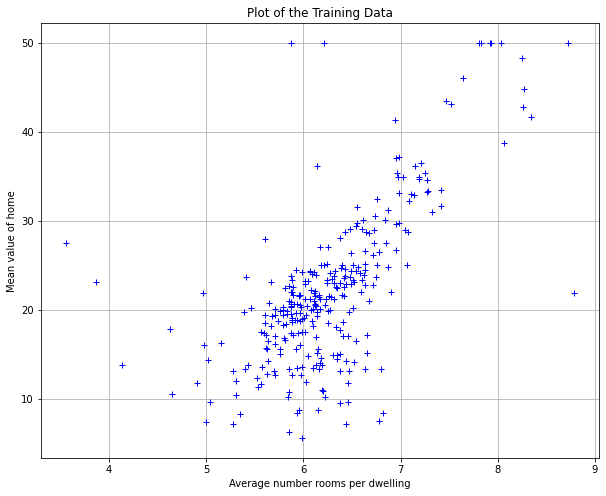

In [4]:
def plot_data(x, y):
    plt.figure(figsize=[10,8])
    plt.plot(x, y, 'b+')
    plt.grid(True)
    plt.xlabel('Average number rooms per dwelling')
    plt.ylabel('Mean value of home')

plot_data(x_train_unnormalised, y_train_unnormalised)
plt.title('Plot of the Training Data')

### 1.3 Normalisation of data

Passes checking function :)


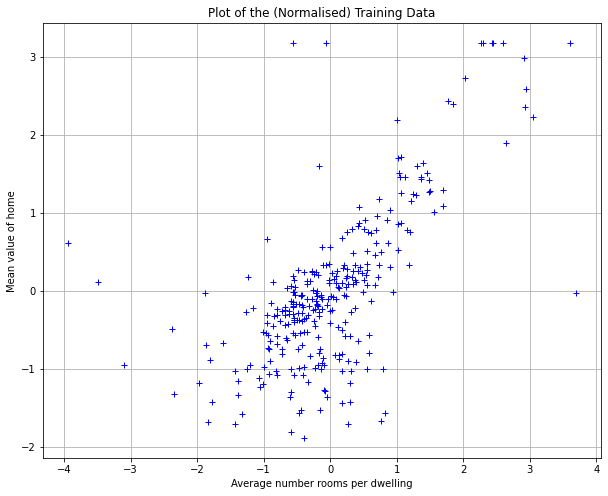

In [5]:
def normalise_data(x_unnormalised):
    # Add your code here..
    # ************************************************************
    a = np.std(x_unnormalised, axis=0)
    b = np.mean(x_unnormalised, axis=0)
    
    x_unnormalised -= b
    x_unnormalised /= a
     
    x_normalised =  x_unnormalised  
    
    return x_normalised, a, b

def unnormalise_data(x_normalised, a, b):
    # Add your code here..
    # ************************************************************
    x_unnormalised = a*x_normalised+b
    
    return x_unnormalised

try:
    x_train, x_norm_a, x_norm_b = normalise_data(x_train_unnormalised)
    y_train, y_norm_a, y_norm_b = normalise_data(y_train_unnormalised)

    x_test, _, _ = normalise_data(x_test_unnormalised)
    y_test, _, _ = normalise_data(y_test_unnormalised)
except Exception as err:
    print('Error during normalisation functions:', err)

def checking_function(normalise_data, unnormalise_data, data_to_check):
    passes_check = False
    
    est_normalised_data, est_a, est_b = normalise_data(data_to_check)
    est_unnormalised_data = unnormalise_data(est_normalised_data, est_a, est_b)
    
    # Add your code here to check that the unnormaliseding the 
    # training data returns to their original values and update 
    # the passes_check boolean..
    # ************************************************************
    if (np.all(np.isclose(est_unnormalised_data, data_to_check))):
        passes_check = True
    
    return passes_check

try:
    if (checking_function(normalise_data, unnormalise_data, x_train_unnormalised) == True) and \
       (checking_function(normalise_data, unnormalise_data, y_train_unnormalised) == True):
        print('Passes checking function :)')
    else:
        print('Failed to pass the checking function :(')
except Exception as err:
    print('Error during checking function:', err)

# Plot the data to make sure they are normalised..
try:
    plot_data(x_train, y_train)
    plt.title('Plot of the (Normalised) Training Data')
except Exception as err:
    print('Error during ploting functions:', err)

## 2. Building the Linear Regression Model

### 2.1 Least Squares Method (with self-defined functions)

In [6]:
def least_squares_error(x, y, w, c):
    # Add code to calcuate the squared_error = E(w,c)..
    # ************************************************************
    
    squared_error = np.sum((y-w*x-c)**2)

    return squared_error

try:
    print('Squared error for w = 1.5, c = 0.5 is ', 
          least_squares_error(x_train, y_train, w=1.5, c=0.5))
except Exception as err:
    print('Error during least squares calculation:', err)

Squared error for w = 1.5, c = 0.5 is  450.5204170316269


Analytic solution:
Analytic w =  0.6710446457297833
Analytic c =  -1.3730647958317782e-17


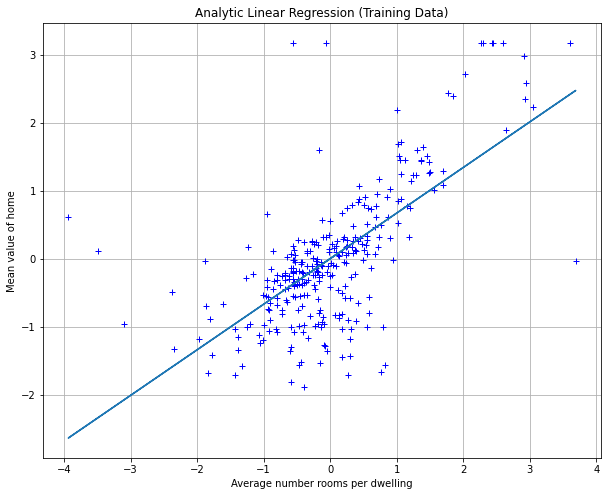

Mean least squares error on TRAINING data =  0.5496990834373893


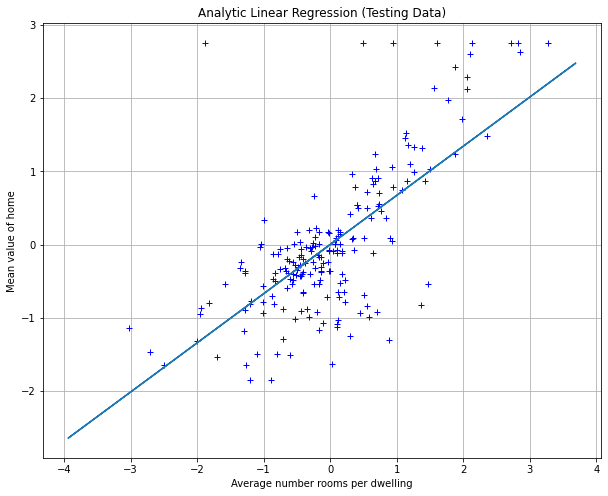

Mean least squares error on TEST data =  0.4774461155374341


In [7]:
def least_squares_analytic_solution(x, y):
    # Add code to calcuate the optimal w and c using the 
    # equations above..
    # ************************************************************
    
    N = x.shape[0]
    A = np.sum(x**2)
    B = np.sum(x)
    C = np.sum(x*y)
    D = np.sum(y)
    
    w = (B*D-N*C)/(B**2 - N*A)
    c = (A*D-B*C)/(A*N-B**2)
    
    return w, c


try:
    w_opt, c_opt = least_squares_analytic_solution(x_train, y_train)
    
    print('Analytic solution:')
    print('Analytic w = ', w_opt)
    print('Analytic c = ', c_opt)
    
except Exception as err:
    print('Error during least squares analytic solution:', err)

    
def plot_estimated_y_for_input_x(w, c):

    plt.plot(x_train, w*x_train+c)
    
    #plt.axline((0,c), slope=w, clip_on=False)
    
    plt.show()
    pass 

try: 
    plot_data(x_train, y_train)
    plt.title('Analytic Linear Regression (Training Data)')
    plot_estimated_y_for_input_x(w_opt, c_opt)
        
    print('Mean least squares error on TRAINING data = ',
          least_squares_error(x_train, y_train, w_opt, c_opt) / x_train.shape[0])

    plot_data(x_test, y_test)
    plt.title('Analytic Linear Regression (Testing Data)')
    plot_estimated_y_for_input_x(w_opt, c_opt)
    
    print('Mean least squares error on TEST data = ',
          least_squares_error(x_test, y_test, w_opt, c_opt) / x_test.shape[0])
    
except Exception as err:
    print('Error during plotting:', err)

### 2.2 Least Squares Method (with Tensorflow)


In [8]:
tf.reset_default_graph()

try:
    # Constants to hold the training data..
    t_x_train = tf.constant(x_train, name='x_train')
    t_y_train = tf.constant(y_train, name='y_train')
except Exception as err:
    print('Error defining training data:', err)
    
# Initial values for optimisation..
w_initial_guess = 1.5
c_initial_guess = 0.5

# Variables to hold w and c
t_w = tf.Variable(w_initial_guess, 
                  dtype=tf.float64, 
                  name='w')
t_c = tf.Variable(c_initial_guess, 
                  dtype=tf.float64, 
                  name='c')

def calculate_tf_least_squares_error(t_x_train, t_y_train, t_w, t_c):
    # Add your code here to calculate t_least_squares_error..
    # ************************************************************
    t_ssd_terms = (t_y_train - t_w * t_x_train - t_c)**2.0
    t_least_squares_error = tf.reduce_sum(t_ssd_terms)
    
    return t_least_squares_error


try:
    tensorflow_result = calculate_tf_least_squares_error(t_x_train, t_y_train, t_w, t_c)
    print(tensorflow_result)
except Exception as err:
    print('Error declaration of calculate_tf_least_squares_error():', err)
    
try:
    # Check with the result from your previous function..
    numpy_result = least_squares_error(x_train, y_train, 
                                       w=w_initial_guess, 
                                       c=c_initial_guess)
    print('Tensorflow least squares error = ', tensorflow_result.numpy())
    print('numpy least squares error = ', numpy_result)    
    
    # This should pass if they are the same to nummerical precision!
    assert(np.isclose(tensorflow_result, numpy_result))
except Exception as err:
    print('Error during optimisation with calculate_tf_least_squares_error():', err)

tf.Tensor(450.5204170316269, shape=(), dtype=float64)
Tensorflow least squares error =  450.5204170316269
numpy least squares error =  450.5204170316269


## 3. Optimisation

## 3.1 Gradient Descent with Tensorflow

In [9]:
tf.reset_default_graph()

try:
    # Constants to hold the training data..
    t_x_train = tf.constant(x_train, name='x_train')
    t_y_train = tf.constant(y_train, name='y_train')
except Exception as err:
    print('Error defining training data:', err)
    
# Initial values for optimisation..
w_initial_guess = 1.5
c_initial_guess = 0.5

# Variables to hold w and c
t_w = tf.Variable(w_initial_guess, 
                  dtype=tf.float64, 
                  name='w')
t_c = tf.Variable(c_initial_guess, 
                  dtype=tf.float64, 
                  name='c')

try:
    with tf.GradientTape() as tape:
        loss = calculate_tf_least_squares_error(t_x_train, t_y_train, t_w, t_c)

    tf_grad_w,tf_grad_c = tape.gradient(loss, (t_w,t_c))

    print('Tensorflow gradient wrt w = ', tf_grad_w.numpy())
    print('Tensorflow gradient wrt c = ', tf_grad_c.numpy())
    
except Exception as err:
    print('Error using calculate_tf_least_squares_error() to find gradients:', err)
    

def calc_gradients_for_least_squares(x, y, w, c):
    # Add your code to evalute the partial derivatives here
    # ************************************************************
    # ...
    
    grad_w = np.sum(2*x*(w*x+c-y))
    grad_c = np.sum(2*(w*x+c-y))
    
    
    return grad_w, grad_c

try:
    numpy_grad_w, numpy_grad_c = calc_gradients_for_least_squares(x_train, 
                                                                  y_train, 
                                                                  w_initial_guess, 
                                                                  c_initial_guess)

    print('Analytic gradient wrt w = ', numpy_grad_w)
    print('Analytic gradient wrt c = ', numpy_grad_c)

    # This should pass if they are the same to nummerical precision!
    assert(np.isclose(tf_grad_w, numpy_grad_w))
    assert(np.isclose(tf_grad_c, numpy_grad_c))
except Exception as err:
    print('Error during calculation with calc_gradients_for_least_squares():', err)

Tensorflow gradient wrt w =  502.3469446877513
Tensorflow gradient wrt c =  303.00000000000006
Analytic gradient wrt w =  502.3469446877513
Analytic gradient wrt c =  303.0


In [10]:
tf.reset_default_graph()

try:
    # Constants to hold the training data..
    t_x_train = tf.constant(x_train, name='x_train')
    t_y_train = tf.constant(y_train, name='y_train')
except Exception as err:
    print('Error defining training data:', err)
    
# Initial values for optimisation..
w_initial_guess = 1.5
c_initial_guess = 0.5

# Variables to hold w and c
t_w = tf.Variable(w_initial_guess, 
                  dtype=tf.float64, 
                  name='w')
t_c = tf.Variable(c_initial_guess, 
                  dtype=tf.float64, 
                  name='c')

try:
    optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.001) #0.001
    
    # Number of iterations to perform
    num_iterations = 40
   
    # Run a number of iterations of gradient descent..
    for iteration in range(num_iterations):
        
        with tf.GradientTape() as tape:
            # We want to minimise the least squares error
            loss = calculate_tf_least_squares_error(t_x_train, t_y_train, t_w, t_c)

        tf_grad_w,tf_grad_c = tape.gradient(loss, (t_w,t_c))
        # Create a gradient descent optimiser that uses a
        # certain step size (learning_rate)..

        optimiser.apply_gradients(zip((tf_grad_w,tf_grad_c),(t_w,t_c)))
        
        print("w: ", t_w.numpy(),"c: ",t_c.numpy())
        print("grad_w: ", tf_grad_w.numpy(),"grad_c: ", tf_grad_c.numpy())
        
        print('iter %4d, E(w,c) = %0.3f' % 
                  (iteration + 1, loss))

    # Get the final results of the optimisation..
    w_tf_opt = t_w.numpy()
    c_tf_opt = t_c.numpy()

    print('\nAfter tensorflow optimisation:')
    print('Tensorflow w = ', w_tf_opt)
    print('Tensorflow c = ', c_tf_opt)
    
    print('\nAnalytic solution:')
    print('Analytic w = ', w_opt)
    print('Analytic c = ', c_opt)
    
except Exception as err:
    print('Error using calculate_tf_least_squares_error():', err)

w:  0.9976530314520491 c:  0.1969999856082722
grad_w:  502.3469446877513 grad_c:  303.00000000000006
iter    1, E(w,c) = 450.520
w:  0.7997283403034381 c:  0.0776179886593189
grad_w:  197.92468174769303 grad_c:  119.38199127861297
iter    2, E(w,c) = 210.640
w:  0.721746017687842 c:  0.030581485297657716
grad_w:  77.98231891163476 grad_c:  47.03650112754727
iter    3, E(w,c) = 173.402
w:  0.6910209848218978 c:  0.01204910432703631
grad_w:  30.725031406583504 grad_c:  18.532380090380585
iter    4, E(w,c) = 167.621
w:  0.6789153227570883 c:  0.004747346758037441
grad_w:  12.105661489821332 grad_c:  7.30175722218401
iter    5, E(w,c) = 166.724
w:  0.6741456922519963 c:  0.00187045448602169
grad_w:  4.769630278546795 grad_c:  2.8768921353707073
iter    6, E(w,c) = 166.584
w:  0.6722664579702764 c:  0.0007369590136543864
grad_w:  1.879234192461006 grad_c:  1.1334954185291601
iter    7, E(w,c) = 166.563
w:  0.6715260397173697 c:  0.000290361830167589
grad_w:  0.7404182177387827 grad_c:  0.44

### 3.2 Gradient Descent (with self-defined functions)

In [11]:
# Parameters...
num_iterations = 200 #20
converge_threshold = 1e-8

# State...
w_current = w_initial_guess
c_current = c_initial_guess

try:
    # Keep track of the error..
    E_current = least_squares_error(x_train, y_train, w_current, c_current)
except Exception as err:
    print('Error defining training data:', err)

current_step_size = 0.1

def run_iteration(x_train, y_train, w_current, c_current, E_current, 
                  current_step_size, converge_threshold):
    # Set to True when converged..
    converged = False

    # Evaluate the gradients..
    grad_w, grad_c = calc_gradients_for_least_squares(x_train, y_train, w_current, c_current)
    print("gradient: ", grad_w, grad_c)

    # Add code to take a step in the direction of the negative
    # gradient proportional to the step size..
    # ************************************************************
    # ...
    print("current step size:", current_step_size)
    w_new = w_current - (current_step_size*(grad_w))
    c_new = c_current - (current_step_size*(grad_c))
    print("new: ", w_new, c_new)
    print("grad_w", grad_w)

    # Evaluate the squared error
    E_new = least_squares_error(x_train, y_train, w_new, c_new)
    

    # Check that error is decreasing and reduce step
    if (E_new > E_current):
        new_step_size = current_step_size * 0.01
        print("error is not decreasing, redoing iteration with new step size: ", new_step_size)
        w_new, c_new, E_new, current_step_size, converged =\
            run_iteration(x_train, y_train, w_current, c_current, E_current, 
                  new_step_size, converge_threshold)

    # Check for convergence and terminate the loop if converged..
    if (abs(E_current - E_new) < converge_threshold):
        converged = True
            
    # Take the step
    w_current = w_new
    c_current = c_new
    E_current = E_new

    return w_current, c_current, E_current, current_step_size, converged


try:
    for iteration in range(num_iterations):
        w_current, c_current, E_current, current_step_size, converged = \
            run_iteration(x_train, y_train, w_current, c_current, E_current, 
                          current_step_size, converge_threshold)
        
        print('iteration %4d, E = %f, w = %f, c = %f' % 
              (iteration, E_current, w_current, c_current))
        
        if converged:
            # Break out of iteration loop..
            print('Converged!')
            break
        
    print('\nAfter gradient descent optimisation:')
    print('Optimised w = ', w_current)
    print('Optimised c = ', c_current)

    print('\nAnalytic solution:')
    print('Analytic w = ', w_opt)
    print('Analytic c = ', c_opt)
    
except Exception as err:
        print('Error during run_iteration():', err)

gradient:  502.3469446877513 303.0
current step size: 0.1
new:  -48.73469446877513 -29.8
grad_w 502.3469446877513
error is not decreasing, redoing iteration with new step size:  0.001
gradient:  502.3469446877513 303.0
current step size: 0.001
new:  0.9976530553122487 0.197
grad_w 502.3469446877513
iteration    0, E = 210.639884, w = 0.997653, c = 0.197000
gradient:  197.92469620697398 119.38200000000002
current step size: 0.001
new:  0.7997283591052747 0.07761799999999999
grad_w 197.92469620697398
iteration    1, E = 173.401790, w = 0.799728, c = 0.077618
gradient:  77.98233030554778 47.03650800000001
current step size: 0.001
new:  0.7217460287997269 0.03058149199999998
grad_w 77.98233030554778
iteration    2, E = 167.621097, w = 0.721746, c = 0.030581
gradient:  30.725038140385823 18.53238415199999
current step size: 0.001
new:  0.6910209906593411 0.01204910784799999
grad_w 30.725038140385823
iteration    3, E = 166.723726, w = 0.691021, c = 0.012049
gradient:  12.105665027311996 7.3